### Visualizing Audio Signals

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.io import wavfile

In [2]:
#Read the audio file
sampling_freq, signal = wavfile.read('data/random_sound.wav')

In [3]:
#Display the params
print('Signal shape: ', signal.shape)
print('Sampling frequency: ', sampling_freq)
print('Datatype: ', signal.dtype)
print(f'Signal duration: {round(signal.shape[0] / float(sampling_freq), 2)} seconds')

Signal shape:  (132300,)
Sampling frequency:  44100
Datatype:  int16
Signal duration: 3.0 seconds


In [4]:
#Normalize the signal
signal = signal / np.power(2, 15)

#Extract the first 50 values to be used for plotting
signal = signal[:50]

time_axis = 1000 * np.arange(0, len(signal), 1) / float(sampling_freq)

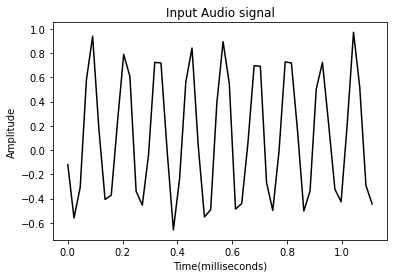

In [5]:
#Plot the audio signal
plt.title('Input Audio signal')
plt.plot(time_axis, signal, color = 'black')

plt.xlabel('Time(milliseconds)')
plt.ylabel('Amplitude');

### Transforming audio signals to the frequency domain

In [6]:
sampling_freq, signal = wavfile.read('data/spoken_word.wav')

In [7]:
#Normalize the values
signal = signal / np.power(2, 15)

#Extract the length and half-length of the signal
len_signal = len(signal)
len_half = np.ceil((len_signal + 1) / 2.0).astype(np.int)

In [8]:
#Apply the Fourier transform to convert the time domain signal to the frequency domain
freq_signal = np.fft.fft(signal)

#Normalize the frequency domain signal and take the square
freq_signal = abs(freq_signal[0:len_half]) / len_signal

freq_signal **= 2

In [9]:
#Extract the length of the frequency transformed signal 
len_fts = len(freq_signal)

#Adjust the signal for even and odd cases
if len_signal % 2:
    freq_signal[1 : len_fts] *= 2
else:
    freq_signal[1 : len_fts - 1] *= 2

In [10]:
#Extract the power value in dB
signal_power = 10 * np.log10(freq_signal)

#Build the X axis, which is the frequency in kHz in this case
x_axis = np.arange(0, len_half, 1) * (sampling_freq / len_signal) / 1000.0

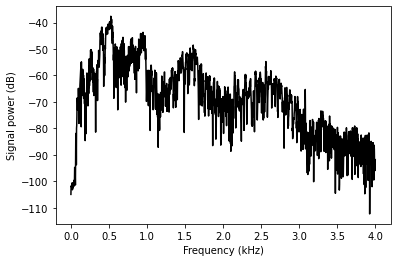

In [11]:
plt.figure()
plt.plot(x_axis, signal_power, color = 'black')

plt.xlabel('Frequency (kHz)')
plt.ylabel('Signal power (dB)');

### Generating Audio signals

In [12]:
#Output file where the audio will be saved
output_file = 'data/generated_audio.wav'

In [13]:
#Specify audio parameters
duration = 4 #in seconds
sampling_freq = 44100 #in Hz
tone_freq = 784
min_val, max_val = -4 * np.pi, 4 * np.pi

In [14]:
#Generate the audio signal
t = np.linspace(min_val, max_val, duration * sampling_freq)

#Since audio signals are mixtures of sinusoids
signal = np.sin(2 * np.pi * tone_freq * t)

In [15]:
#Add some noise to the signal
noise = 0.5 * np.random.rand(duration * sampling_freq)
signal += noise

In [16]:
#Normalize and scale the signal to 16-bit integer values
signal_normalized = signal / np.max(np.abs(signal))
scaling_factor = np.power(2, 15) - 1

signal_scaled = np.int16(signal_normalized * scaling_factor)

In [17]:
#Save the audio signal to the output file
wavfile.write(output_file, sampling_freq, signal_scaled)

In [18]:
#Extract the first 200 values from the audio signal for plotting
signal = signal[:200]

time_axis = 1000 * np.arange(0, len(signal), 1) / float(sampling_freq)

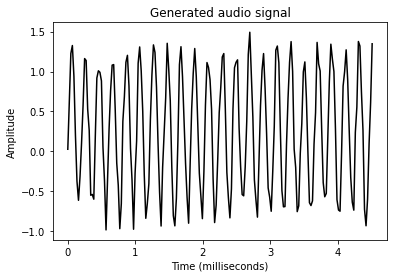

In [19]:
plt.title('Generated audio signal')
plt.plot(time_axis, signal, color = 'k')

plt.xlabel('Time (milliseconds)')
plt.ylabel('Amplitude');

### Synthesizing tones to generate music

In [20]:
import json

In [21]:
def tone_synthesizer(freq, duration, amplitude = 1.0, sampling_freq = 44100):
    #Construct the time axis
    if duration or sampling_freq != int:
        time_axis = np.arange(0, duration, )
    else:
        time_axis = np.linspace(0, duration, duration * sampling_freq)
    
    #Construct the audio signal
    signal = amplitude * np.sin(2 * np.pi * freq * time_axis)
    
    return signal.astype(np.int16)

In [22]:
file_tone_single = 'data/generated_tone_single.wav'
file_tone_sequence = 'data/generated_tone_sequence.wav'

In [23]:
#Using tone mapping from 'http://www.phy.mtu.edu/~suits/notefreqs.html'
mapping_file = 'data/tone_mapping.json'

#Load the tone to frequency map
with open(mapping_file, 'r') as f:
    tone_map = json.loads(f.read())

In [24]:
#Set input parameters to generate 'F' tone
tone_name = 'F'
tone_freq = tone_map[tone_name]

duration = 3 #in seconds
amplitude = 12000
sampling_freq = 44100 #in Hz

In [25]:
synthesized_tone = tone_synthesizer(tone_freq, duration, amplitude)

#Write the signal to the audio file
wavfile.write(file_tone_single, sampling_freq, synthesized_tone)

In [26]:
#Let's generate a tone sequence to make it sound like music
tone_sequence = [('G', 4), ('D', 5), ('F', 3), ('C', 6), ('A', 4)]

#Construct the audio signal based on the above sequence
signal = np.array([])
for item in tone_sequence:
    tone_name = item[0]
    freq = tone_map[tone_name]
    
    duration = item[1]
    
    synthesized_tone = tone_synthesizer(freq, duration, amplitude)
    signal = np.append(signal, synthesized_tone, axis = 0)
    
#Write the sequence signal to an audio file
wavfile.write(file_tone_sequence, sampling_freq, signal)

### Extracting speech features

In [27]:
%cd C:\Users\U\Artificial Intelligence\data

C:\Users\U\Artificial Intelligence\data


In [28]:
from features import mfcc, logfbank

In [29]:
#Read the input audio file
sampling_freq, signal = wavfile.read('random_sound.wav')

In [30]:
#Take the first 10,000 samples for analysis
signal = signal[:10000]

#Extract the MFCC features
features_mfcc = mfcc(signal, sampling_freq)

In [31]:
#Print the parameters for MFCC
print(f'MFCC: \nNumber of windows = {features_mfcc.shape[0]}')
print(f'Length of each feature = {features_mfcc.shape[1]}')

MFCC: 
Number of windows = 22
Length of each feature = 13


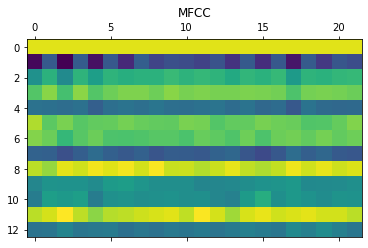

In [32]:
#Plot the features
features_mfcc = features_mfcc.T

plt.title('MFCC')
plt.matshow(features_mfcc, fignum = 0);

In [33]:
#Extract the filter Bank features
features_fb = logfbank(signal, sampling_freq)

#Print the parameters
print(f'Filter bank: \nNumber of windows = {features_fb.shape[0]}')
print(f'Length of each feature = {features_fb.shape[1]}')

Filter bank: 
Number of windows = 22
Length of each feature = 26


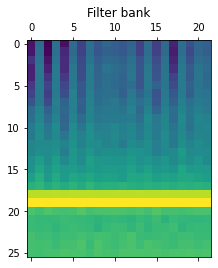

In [34]:
#Plot the features
features_fb = features_fb.T

plt.title('Filter bank')
plt.matshow(features_fb, fignum = 0);

### Recognizing spoken words

In [40]:
%run speech_recognizer.py --input-folder data


Original: apple
Predicted: apple

Original: banana
Predicted: banana

Original: kiwi
Predicted: kiwi

Original: lime
Predicted: lime

Original: orange
Predicted: orange

Original: peach
Predicted: peach

Original: pineapple
Predicted: pineapple
